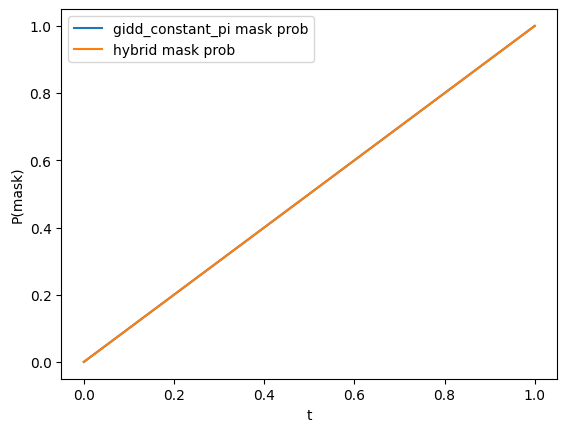

In [4]:
import torch
import matplotlib.pyplot as plt
from discrete_diffusion.noise_schedules.gidd_constant_pi import GiddLinearNoise
from discrete_diffusion.noise_schedules.hybrid import HybridDiffusion


# mock tokenizer-like object
class Tok:
    def __init__(self, vocab, mask_id):
        self.mask_token_id = mask_id
        self._len = vocab

    def __len__(self):
        return self._len


tok = Tok(vocab=50257, mask_id=50256)
t = torch.linspace(1e-4, 1 - 1e-4, 500)

gidd = GiddLinearNoise(tok, p_uniform=0)
alpha_g, beta_g = gidd.get_alpha_betapi(t)
mask_g = beta_g[:, tok.mask_token_id]

hyb = HybridDiffusion(tok, p_uniform=0.0, clip_noise=20, gamma=1.0)
alpha_h, beta_h = hyb.get_alpha_betapi(t)
mask_h = beta_h[:, tok.mask_token_id]

plt.plot(t, mask_g, label="gidd_constant_pi mask prob")
plt.plot(t, mask_h, label="hybrid mask prob")
plt.legend()
plt.xlabel("t")
plt.ylabel("P(mask)")
plt.show()

In [7]:
(mask_g == mask_h).all()

tensor(True)